In [52]:
from google.colab import files
up = files.upload()
for fn in up.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(up[fn])))
  

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [2]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2557           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10346            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4062           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         36           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2565           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2927           False  
aerial-c

In [3]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 50.8MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.69MB/s]


In [0]:
import pandas as pd
import numpy as np
import sklearn.ensemble as sk_en
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as LE

In [2]:
data_train = pd.read_csv('train.csv')

data_test = pd.read_csv('test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
data_test.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)
data_test.set_index('PassengerId',inplace=True)

data_train.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)
data_train.set_index('PassengerId',inplace=True)

In [5]:

data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [6]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [0]:
fea_num = ['Age','SibSp','Parch','Fare']
fea_label  = ['Pclass','Sex','Embarked']
data_test = data_test.fillna(data_test[fea_num].mean())
data_test = data_test.fillna(data_test[fea_label].mode().iloc[0])

data_train = data_train.fillna(data_train[fea_num].mean())
data_train = data_train.fillna(data_train[fea_label].mode().iloc[0])

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [0]:
data_train['family'] = data_train['SibSp'] + data_train['Parch']

In [0]:
data_train['alone'] = 0
data_train.loc[data_train.family == 0, 'alone'] = 1

In [12]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1,0
2,1,1,female,38.0,1,0,71.2833,C,1,0
3,1,3,female,26.0,0,0,7.9250,S,0,1
4,1,1,female,35.0,1,0,53.1000,S,1,0
5,0,3,male,35.0,0,0,8.0500,S,0,1


In [13]:
data_test['family'] = data_test['SibSp'] + data_test['Parch']
data_test['alone'] = 0
data_test.loc[data_test.family == 0, 'alone'] = 1
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,0,1
893,3,female,47.0,1,0,7.0000,S,1,0
894,2,male,62.0,0,0,9.6875,Q,0,1
895,3,male,27.0,0,0,8.6625,S,0,1
896,3,female,22.0,1,1,12.2875,S,2,0


In [0]:
data_train.drop(['SibSp','Parch'],axis=1, inplace=True)
data_test.drop(['SibSp','Parch'],axis=1, inplace=True)

In [15]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,alone
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,1,0
2,1,1,female,38.0,71.2833,C,1,0
3,1,3,female,26.0,7.9250,S,0,1
4,1,1,female,35.0,53.1000,S,1,0
5,0,3,male,35.0,8.0500,S,0,1


In [0]:
encoder = LE()
data_train['gender'] = encoder.fit_transform(data_train['Sex'])


In [0]:

data_train['Emb'] = encoder.fit_transform(data_train['Embarked'])

In [18]:
data_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family,alone,gender,Emb
PassengerId,,,,,,,,,,
1,0,3,male,22.0,7.2500,S,1,0,1,2
2,1,1,female,38.0,71.2833,C,1,0,0,0
3,1,3,female,26.0,7.9250,S,0,1,0,2
4,1,1,female,35.0,53.1000,S,1,0,0,2
5,0,3,male,35.0,8.0500,S,0,1,1,2


In [0]:
data_test['gender'] = encoder.fit_transform(data_test['Sex'])
data_test['Emb'] = encoder.fit_transform(data_test['Embarked'])

In [20]:
data_test.head()

,Pclass,Sex,Age,Fare,Embarked,family,alone,gender,Emb
PassengerId,,,,,,,,,
892,3,male,34.5,7.8292,Q,0,1,1,1
893,3,female,47.0,7.0000,S,1,0,0,2
894,2,male,62.0,9.6875,Q,0,1,1,1
895,3,male,27.0,8.6625,S,0,1,1,2
896,3,female,22.0,12.2875,S,2,0,0,2


In [22]:
data_test.head()

,Pclass,Age,Fare,family,alone,gender,Emb
PassengerId,,,,,,,
892,3,34.5,7.8292,0,1,1,1
893,3,47.0,7.0000,1,0,0,2
894,2,62.0,9.6875,0,1,1,1
895,3,27.0,8.6625,0,1,1,2
896,3,22.0,12.2875,2,0,0,2


In [0]:
data_train.drop(['Sex','Embarked'],axis=1, inplace=True)
data_test.drop(['Sex','Embarked'],axis=1, inplace=True)

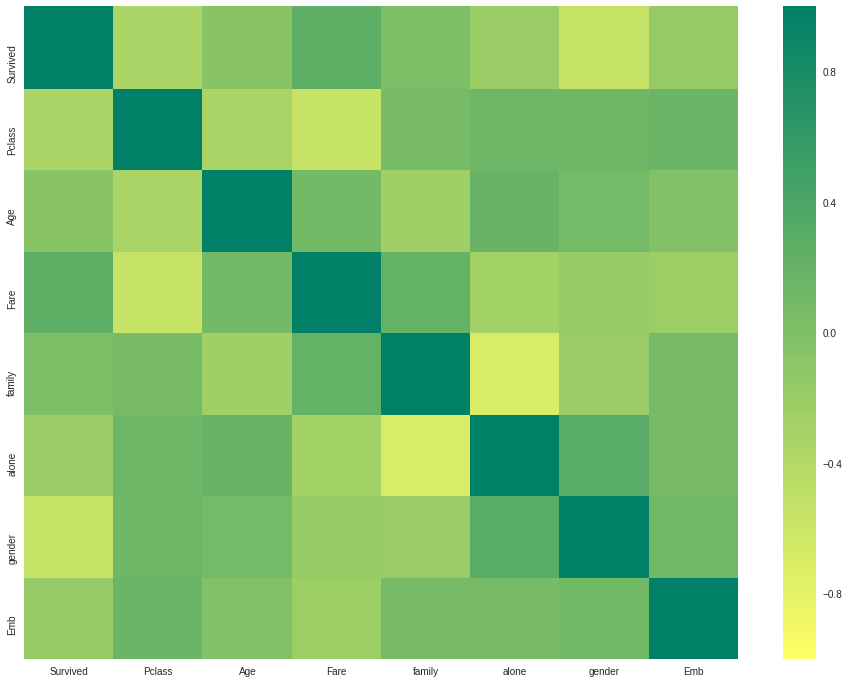

In [23]:
pt.figure(figsize=(16,12))
sns.heatmap(data_train.corr(),cmap='summer_r');

In [0]:
X = data_train.drop(['Survived'],axis =1)

In [0]:
Y = data_train['Survived']

In [0]:
GBC = sk_en.GradientBoostingClassifier()

In [27]:
GBC.fit(X,Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [0]:
pre = GBC.predict(data_test)
pre =pd.Series(pre)

In [35]:
sub_test = pd.read_csv('gender_submission.csv')
sub_test.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [47]:
sub_test.drop(['Survived'],axis = 1,inplace =True)


ValueError: ignored

In [0]:
sub_test['Survived'] = pre 
  

In [50]:
sub_test.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
sub_test.to_csv('TitanicSubmission.csv')

In [0]:
from google.colab import files
files.download('TitanicSubmission.csv')